In [59]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import numpy as np
import torch
import torch.nn as nn
from skimage import io, transform
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import random
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import os
from os import walk
import matplotlib.pyplot as plt
import math
import scipy




In [61]:

def read_HSI():
  X = np.load('./Indian Pines Dataset/ToA.npy')
  y = np.load('./Indian Pines Dataset/Indian_pines_gt.npy')
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (145, 145, 220)
y shape: (145, 145)


# Visualise band

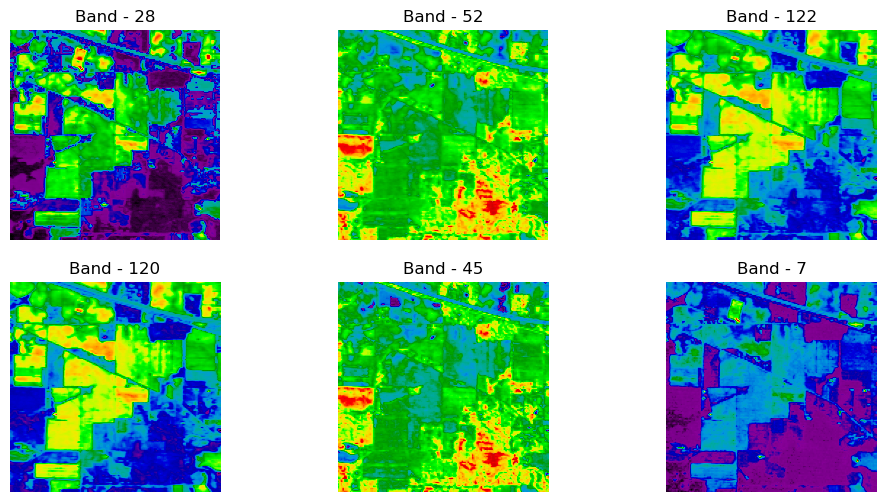

In [62]:

fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')

# Visualize the Ground Truth

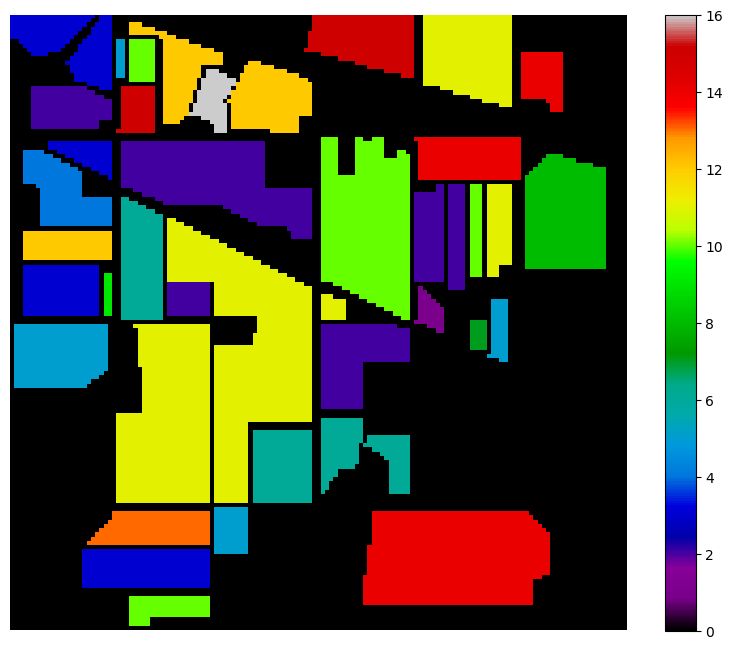

In [63]:

plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

# Convert the dataset into dataframe

In [64]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  #df.to_csv('Dataset.csv')
  return df

df = extract_pixels(X, y)


In [65]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band212,band213,band214,band215,band216,band217,band218,band219,band220,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1090,1112,1090,1062,1069,1057,1020,1020,1005,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1104,1117,1091,1079,1085,1064,1029,1020,1000,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1114,1114,1100,1065,1092,1061,1030,1016,1009,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1108,1109,1109,1071,1088,1060,1030,1006,1005,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1107,1112,1094,1072,1087,1052,1034,1019,1019,3


# Training pixels for each percentage 

In [66]:
X_train5 = np.load('./Aman/5percent/tr.npy')
X_train10 = np.load('./Aman/10percent/tr.npy')
X_train15 = np.load('./Aman/15percent/tr.npy')
X_train20 = np.load('./Aman/20percent/tr.npy')
X_train25 = np.load('./Aman/25percent/tr.npy')
X_train30 = np.load('./Aman/30percent/tr.npy')


In [67]:
temp_5=([False for i in range(len(df))])
temp_10=([False for i in range(len(df))])
temp_15=([False for i in range(len(df))])
temp_20=([False for i in range(len(df))])
temp_25=([False for i in range(len(df))])
temp_30=([False for i in range(len(df))])

In [68]:
for i in range(145):
    for j in range(145):
        if(X_train5[i][j]!=17):
            temp_5[i*145+j]=True
        if(X_train10[i][j]!=17):
            temp_10[i*145+j]=True
        if(X_train15[i][j]!=17):
            temp_15[i*145+j]=True
        if(X_train20[i][j]!=17):
            temp_20[i*145+j]=True
        if(X_train25[i][j]!=17):
            temp_25[i*145+j]=True
        if(X_train30[i][j]!=17):
            temp_30[i*145+j]=True

In [69]:
X_train5=df[temp_5]
X_train10=df[temp_10]
X_train15=df[temp_15]
X_train20=df[temp_20]
X_train25=df[temp_25]
X_train30=df[temp_30]

In [70]:
X_train5=X_train5[X_train5['class']!=0]
y_train5 = X_train5.loc[:, 'class'].values
X_train5 = X_train5.drop(['class'],axis=1)
X_train5.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band211,band212,band213,band214,band215,band216,band217,band218,band219,band220
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,1019
10,3858,4517,4497,4270,4815,4872,5091,4983,4888,4644,...,1107,1110,1097,1083,1064,1071,1039,1034,1011,1010
76,2570,3635,4130,3828,4225,4451,4481,4310,4251,3982,...,1018,1024,1015,1017,1008,1015,1008,1010,1010,1000
89,3170,3886,3863,3814,3983,4373,4289,4164,4068,3818,...,1030,1016,1010,1021,1006,1016,1003,1006,1000,1005
100,2749,4146,4603,4431,4910,5352,5438,5309,5280,5065,...,1120,1120,1119,1105,1085,1096,1065,1029,1029,1010


In [71]:
X_train10=X_train10[X_train10['class']!=0]
y_train10 = X_train10.loc[:, 'class'].values
X_train10 = X_train10.drop(['class'],axis=1)
X_train10.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band211,band212,band213,band214,band215,band216,band217,band218,band219,band220
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,1019
7,2575,4014,4590,4284,4663,5038,5026,4921,4905,4720,...,1108,1097,1110,1081,1071,1077,1052,1034,1015,1015
10,3858,4517,4497,4270,4815,4872,5091,4983,4888,4644,...,1107,1110,1097,1083,1064,1071,1039,1034,1011,1010
76,2570,3635,4130,3828,4225,4451,4481,4310,4251,3982,...,1018,1024,1015,1017,1008,1015,1008,1010,1010,1000
81,2657,3755,4037,3885,4097,4378,4294,4164,4037,3772,...,1012,1011,1012,1015,1014,1006,1008,992,1010,1004


In [72]:
X_train15=X_train15[X_train15['class']!=0]
y_train15 = X_train15.loc[:, 'class'].values
X_train15 = X_train15.drop(['class'],axis=1)
X_train15.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band211,band212,band213,band214,band215,band216,band217,band218,band219,band220
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,1009
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,1019
7,2575,4014,4590,4284,4663,5038,5026,4921,4905,4720,...,1108,1097,1110,1081,1071,1077,1052,1034,1015,1015
10,3858,4517,4497,4270,4815,4872,5091,4983,4888,4644,...,1107,1110,1097,1083,1064,1071,1039,1034,1011,1010
17,2575,4010,4130,4180,4344,4598,4618,4450,4430,4141,...,1060,1067,1069,1055,1048,1050,1032,1011,1010,1015


In [73]:
X_train20=X_train20[X_train20['class']!=0]
y_train20 = X_train20.loc[:, 'class'].values
X_train20 = X_train20.drop(['class'],axis=1)
X_train20.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band211,band212,band213,band214,band215,band216,band217,band218,band219,band220
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,1009
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,1019
7,2575,4014,4590,4284,4663,5038,5026,4921,4905,4720,...,1108,1097,1110,1081,1071,1077,1052,1034,1015,1015
10,3858,4517,4497,4270,4815,4872,5091,4983,4888,4644,...,1107,1110,1097,1083,1064,1071,1039,1034,1011,1010
15,2575,4010,4223,4118,4454,4701,4755,4579,4543,4248,...,1081,1092,1091,1073,1055,1073,1047,1025,1015,1015


In [74]:
X_train25=X_train25[X_train25['class']!=0]
y_train25 = X_train25.loc[:, 'class'].values
X_train25 = X_train25.drop(['class'],axis=1)
X_train25.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band211,band212,band213,band214,band215,band216,band217,band218,band219,band220
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,1009
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,1019
7,2575,4014,4590,4284,4663,5038,5026,4921,4905,4720,...,1108,1097,1110,1081,1071,1077,1052,1034,1015,1015
10,3858,4517,4497,4270,4815,4872,5091,4983,4888,4644,...,1107,1110,1097,1083,1064,1071,1039,1034,1011,1010
15,2575,4010,4223,4118,4454,4701,4755,4579,4543,4248,...,1081,1092,1091,1073,1055,1073,1047,1025,1015,1015


In [75]:
X_train30=X_train30[X_train30['class']!=0]
y_train30 = X_train30.loc[:, 'class'].values
X_train30 = X_train30.drop(['class'],axis=1)
X_train30.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band211,band212,band213,band214,band215,band216,band217,band218,band219,band220
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,1009
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,1019
7,2575,4014,4590,4284,4663,5038,5026,4921,4905,4720,...,1108,1097,1110,1081,1071,1077,1052,1034,1015,1015
10,3858,4517,4497,4270,4815,4872,5091,4983,4888,4644,...,1107,1110,1097,1083,1064,1071,1039,1034,1011,1010
15,2575,4010,4223,4118,4454,4701,4755,4579,4543,4248,...,1081,1092,1091,1073,1055,1073,1047,1025,1015,1015


# Developing Decision Tree

In [76]:
train_X=X_train30
train_y=y_train30

train_X.reset_index(inplace=True,drop=True)

In [77]:
train_y

array([ 3,  3,  3, ..., 10, 10, 10], dtype=uint8)

In [78]:
X = df[df['class'] != 0]
y = X.loc[:, 'class'].values
X.reset_index(inplace=True,drop=True)

X = X.drop(['class'],axis=1)
x = df[df['class'] != 0]
x.reset_index(inplace=True,drop=True)


In [79]:
names = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']

In [22]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(train_X,train_y)
y_train_pred = clf.predict(train_X)
y_test_pred = clf.predict(X)


/home/mt0/22CS60R59/miniconda3/envs/aman/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mt0/22CS60R59/miniconda3/envs/aman/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mt0/22CS60R59/miniconda3/envs/aman/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mt0/22CS60R59/miniconda3/envs/aman/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

In [259]:

print(f'Train score {accuracy_score(y_train_pred,train_y)}')
print(f'Test score {accuracy_score(y_test_pred,y)}')


Train score 1.0
Test score 0.7753927212410967


In [1]:
#start from here
clf_ = tree.DecisionTreeClassifier()
clf_.fit(train_X,train_y)
y_train_pred = clf_.predict(train_X)
y_test_pred = clf_.predict(X)



NameError: name 'tree' is not defined

In [261]:

print(f'Train score {accuracy_score(y_train_pred,train_y)}')
print(f'Test score {accuracy_score(y_test_pred,y)}')


Train score 1.0
Test score 0.7707093374963411


# Extracting Rules

In [262]:
n_nodes = clf_.tree_.node_count
children_left = clf_.tree_.children_left
children_right = clf_.tree_.children_right
feature = clf_.tree_.feature
threshold = clf_.tree_.threshold

In [263]:

def dfs(children_left,children_right,feature,thresold,i,path,rules):
    
  global rule_count
  global flag
  next=[]
  for decision in path:
    next.append(decision)
  if ((children_left[i]==(-1)) and (children_right[i]==(-1))):
    next.append(np.argmax(np.array(clf_.tree_.value[i])))
    if flag==0:
        print(np.array(clf_.tree_.value[i]))
        flag=1
    rule_count+=1
    rules[rule_count]=next

  else:
    #next.append((feature[i],thresold[i]))
    left=[(feature[i],thresold[i],'T')]
    right=[(feature[i],thresold[i],'F')]
    if(children_left[i]!=(-1)):
      dfs(children_left,children_right,feature,thresold,children_left[i],path+left,rules)
    if(children_right[i]!=(-1)):
      dfs(children_left,children_right,feature,thresold,children_right[i],path+right,rules)



In [264]:
rules={}
flag=0
rule_count=0
dfs(children_left,children_right,feature,threshold,0,[],rules)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0.]]


In [265]:
rules[1]
#len(rules.keys())
#rule_count
#rules[100][len(rules[100])-1]

[(31, 2262.5, 'T'),
 (26, 2407.5, 'T'),
 (35, 3881.0, 'T'),
 (113, 1090.0, 'T'),
 13]

In [266]:
#np.min(np.array(feature))
#print(hildren_left[5],children_right[5])
def satisfy_rule(a,rules,i):
  ans=True
  for j in range(len(rules[i])-1):
    feature=rules[i][j][0]
    th=rules[i][j][1]
    d=True
    if(rules[i][j][2]=='F'):
      d=False
    if((a[feature]<=th)  and (d==False)):
      #print(feature,':',th,':',d,':',a[feature])
      return False

    if((a[feature]>th)  and (d==True)):
      #print(feature,':',th,':',d,':',a[feature])
      return False

  return True


for i in range(len(rules.keys())):
  if satisfy_rule(X.iloc[0],rules,i+1):
    print('given data is satisfying rule number ',i+1)







given data is satisfying rule number  232


/tmp/ipykernel_1522472/3811707775.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if((a[feature]<=th)  and (d==False)):
/tmp/ipykernel_1522472/3811707775.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if((a[feature]>th)  and (d==True)):


In [267]:
#incorrect=[]
#info=[]
#x.head()
#correct[j]=0
#incorrect[j]=0
correct_=[]
y__=clf_.predict(train_X)
c=0
for i in range(len(train_y)):
  if(train_y[i]!=y__[i]):
      c+=1
#print(c)

for id in rules.keys():
  #correct[j]+=1
  i=0
  c=0
  l=0

  for i in range(len(train_X)):
    #print('hii')
    if ((satisfy_rule(train_X.iloc[i],rules,id))):
      l+=1
      if((rules[id][len(rules[id])-1]+1)==train_y[i]):
        c+=1
  if((c/l)>=0.95):
    correct_.append(id)









/home/mt0/22CS60R59/miniconda3/envs/aman/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mt0/22CS60R59/miniconda3/envs/aman/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mt0/22CS60R59/miniconda3/envs/aman/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/tmp/ipykernel_1522472/3811707775.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future 

In [268]:
train_y

array([ 3,  3,  3, ..., 10, 10, 10], dtype=uint8)

In [269]:
len(correct_)

447

In [270]:
#rules[21][len(rules[21])-1]
#incorrect
#for id in incorrect:
data=[[id,rules[id]] for id in correct_]


In [271]:
df= pd.DataFrame(data, columns=['Rule no. ', 'Rule'])
df.head()


,Rule no.,Rule
0,1,"[(31, 2262.5, T), (26, 2407.5, T), (35, 3881.0..."
1,2,"[(31, 2262.5, T), (26, 2407.5, T), (35, 3881.0..."
2,3,"[(31, 2262.5, T), (26, 2407.5, T), (35, 3881.0..."
3,4,"[(31, 2262.5, T), (26, 2407.5, T), (35, 3881.0..."
4,5,"[(31, 2262.5, T), (26, 2407.5, T), (35, 3881.0..."


In [272]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


In [273]:
pip install python-docx


Note: you may need to restart the kernel to use updated packages.


In [274]:
import docx

In [275]:
# open an existing document
doc = docx.Document('./Report.docx')

In [276]:
# add a table to the end and create a reference variable
# extra row is so we can add the header row
t = doc.add_table(df.shape[0]+1, df.shape[1])
# add the header rows.
for j in range(df.shape[-1]):
    t.cell(0,j).text = df.columns[j]
# add the rest of the data frame
for i in range(df.shape[0]):
    for j in range(df.shape[-1]):
        t.cell(i+1,j).text = str(df.values[i,j])

# save the doc
doc.save('./Report.docx')

# Performance of rules having accuracy atleast 95 % on training dataset 

In [277]:
table2=[]
correct_


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [278]:
for id in correct_:
  correct=0
  incorrect=0
  for i in range(len(X)):
    if (satisfy_rule(X.iloc[i],rules,id)):
      if(y[i]==(rules[id][len(rules[id])-1]+1)):
        correct+=1
      else:
        incorrect+=1
  #print(correct,'\n',incorrect)
  table2.append([id,correct,incorrect,correct/(correct+incorrect),rules[id][len(rules[id])-1]+1])



#a



/tmp/ipykernel_1522472/3811707775.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if((a[feature]<=th)  and (d==False)):
/tmp/ipykernel_1522472/3811707775.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if((a[feature]>th)  and (d==True)):


In [279]:
table2

[[1, 11, 4, 0.7333333333333333, 14],
 [2, 19, 13, 0.59375, 15],
 [3, 1, 0, 1.0, 5],
 [4, 773, 25, 0.968671679197995, 14],
 [5, 1, 0, 1.0, 5],
 [6, 3, 0, 1.0, 14],
 [7, 28, 4, 0.875, 14],
 [8, 2, 14, 0.125, 15],
 [9, 6, 11, 0.35294117647058826, 15],
 [10, 5, 0, 1.0, 14],
 [11, 1, 3, 0.25, 15],
 [12, 163, 6, 0.9644970414201184, 14],
 [13, 1, 0, 1.0, 15],
 [14, 1, 2, 0.3333333333333333, 15],
 [15, 1, 3, 0.25, 5],
 [16, 2, 3, 0.4, 15],
 [17, 3, 0, 1.0, 14],
 [18, 57, 5, 0.9193548387096774, 5],
 [19, 8, 3, 0.7272727272727273, 5],
 [20, 1, 3, 0.25, 5],
 [21, 1, 2, 0.3333333333333333, 15],
 [22, 111, 33, 0.7708333333333334, 14],
 [23, 4, 3, 0.5714285714285714, 14],
 [24, 1, 0, 1.0, 15],
 [25, 1, 1, 0.5, 5],
 [26, 7, 4, 0.6363636363636364, 14],
 [27, 41, 22, 0.6507936507936508, 15],
 [28, 5, 3, 0.625, 13],
 [29, 7, 5, 0.5833333333333334, 14],
 [30, 6, 0, 1.0, 15],
 [31, 3, 0, 1.0, 5],
 [32, 28, 10, 0.7368421052631579, 14],
 [33, 1, 5, 0.16666666666666666, 13],
 [34, 2, 1, 0.6666666666666666, 1

In [280]:
table2_ = pd.DataFrame(table2, columns=['rule no.', 'correclty classified','incorrectly classified ','accuracy','class'])

In [281]:
# add a table to the end and create a reference variable
# extra row is so we can add the header row
t = doc.add_table(table2_.shape[0]+1, table2_.shape[1])
# add the header rows.
for j in range(table2_.shape[-1]):
    t.cell(0,j).text = table2_.columns[j]
# add the rest of the data frame
for i in range(table2_.shape[0]):
    for j in range(table2_.shape[-1]):
        t.cell(i+1,j).text = str(table2_.values[i,j])

# save the doc
doc.save('./Report.docx')

In [282]:
table2_.head()

,rule no.,correclty classified,incorrectly classified,accuracy,class
0,1,11,4,0.733333,14
1,2,19,13,0.593750,15
2,3,1,0,1.000000,5
3,4,773,25,0.968672,14
4,5,1,0,1.000000,5


In [283]:
len(table2_)

447

# Manipulation

In [525]:
df.head()

,rule_number,correctly_classified,incorrectly_classified,accuracy,class_
0,1.0,10.0,3.0,0.769231,14.0
1,2.0,22.0,14.0,0.611111,15.0
2,3.0,31.0,0.0,1.000000,14.0
3,4.0,5.0,5.0,0.500000,5.0
4,5.0,1.0,3.0,0.250000,15.0


In [307]:
pip install python-docx


Note: you may need to restart the kernel to use updated packages.


In [308]:
import docx

In [526]:
count={11:2455,2 :1428,14 :1265,10 :972,3:830,6:730,12:593,5:483,8:478,15:386,4:237,13:205,16:93,1:46,7 :28,9:20}

In [527]:
count[11]

2455

In [528]:
document = docx.Document("./1.docx")


In [529]:
table=document.tables[5]

In [530]:
data = [[cell.text for cell in row.cells] for row in table.rows]
df = pd.DataFrame(data)

In [531]:
df.head()

,0,1,2,3,4
0,1.0,11.0,4.0,0.7333333333333333,14.0
1,2.0,19.0,13.0,0.59375,15.0
2,3.0,1.0,0.0,1.0,5.0
3,4.0,773.0,25.0,0.968671679197995,14.0
4,5.0,1.0,0.0,1.0,5.0


In [532]:
len(df)

447

In [533]:
df.columns = ['rule_number', 'correctly_classified', 'incorrectly_classified','accuracy','class_']

In [534]:
df.head()

,rule_number,correctly_classified,incorrectly_classified,accuracy,class_
0,1.0,11.0,4.0,0.7333333333333333,14.0
1,2.0,19.0,13.0,0.59375,15.0
2,3.0,1.0,0.0,1.0,5.0
3,4.0,773.0,25.0,0.968671679197995,14.0
4,5.0,1.0,0.0,1.0,5.0


In [535]:
df["rule_number"] = df.rule_number.astype(float)
df["class_"] = df.class_.astype(float)
df["accuracy"]=df.accuracy.astype(float)
df["correctly_classified"]=df.correctly_classified.astype(float)
df["incorrectly_classified"]=df.incorrectly_classified.astype(float)

In [536]:
df1=df[df['class_']==1.0]
df2=df[df['class_']==2.0]
df3=df[df['class_']==3.0]
df4=df[df['class_']==4.0]
df5=df[df['class_']==5.0]
df6=df[df['class_']==6.0]
df7=df[df['class_']==7.0]
df8=df[df['class_']==8.0]
df9=df[df['class_']==9.0]
df10=df[df['class_']==10.0]
df11=df[df['class_']==11.0]
df12=df[df['class_']==12.0]
df13=df[df['class_']==13.0]
df14=df[df['class_']==14.0]
df15=df[df['class_']==15.0]
df16=df[df['class_']==16.0]


In [537]:
df1

,rule_number,correctly_classified,incorrectly_classified,accuracy,class_
98,99.0,21.0,7.0,0.750000,1.0
102,103.0,4.0,6.0,0.400000,1.0
107,108.0,2.0,1.0,0.666667,1.0
109,110.0,1.0,1.0,0.500000,1.0
112,113.0,1.0,1.0,0.500000,1.0


In [538]:
df1.describe()

,rule_number,correctly_classified,incorrectly_classified,accuracy,class_
count,5.00000,5.00000,5.00000,5.000000,5.0
mean,106.60000,5.80000,3.20000,0.563333,1.0
std,5.59464,8.58487,3.03315,0.141618,0.0
min,99.00000,1.00000,1.00000,0.400000,1.0
25%,103.00000,1.00000,1.00000,0.500000,1.0
50%,108.00000,2.00000,1.00000,0.500000,1.0
75%,110.00000,4.00000,6.00000,0.666667,1.0
max,113.00000,21.00000,7.00000,0.750000,1.0


In [539]:
df.describe()

,rule_number,correctly_classified,incorrectly_classified,accuracy,class_
count,447.000000,447.000000,447.000000,447.000000,447.000000
mean,224.000000,17.671141,5.257271,0.623685,8.046980
std,129.182042,62.440010,7.411876,0.265895,4.614272
min,1.000000,1.000000,0.000000,0.076923,1.000000
25%,112.500000,1.000000,1.000000,0.400000,3.000000
50%,224.000000,3.000000,3.000000,0.650794,10.000000
75%,335.500000,9.000000,6.000000,0.854103,11.000000
max,447.000000,773.000000,53.000000,1.000000,16.000000


In [540]:
df

,rule_number,correctly_classified,incorrectly_classified,accuracy,class_
0,1.0,11.0,4.0,0.733333,14.0
1,2.0,19.0,13.0,0.593750,15.0
2,3.0,1.0,0.0,1.000000,5.0
3,4.0,773.0,25.0,0.968672,14.0
4,5.0,1.0,0.0,1.000000,5.0
...,...,...,...,...,...
442,443.0,9.0,1.0,0.900000,2.0
443,444.0,2.0,0.0,1.000000,12.0
444,445.0,1.0,3.0,0.250000,3.0
445,446.0,1.0,0.0,1.000000,3.0


In [541]:
df1.sort_values(by = 'accuracy',inplace=True, ascending = False)
df2.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df3.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df4.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df5.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df6.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df7.sort_values(by = 'accuracy',inplace=True, ascending = False)
df8.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df9.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df10.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df11.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df12.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df13.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df14.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df15.sort_values(by = 'accuracy',inplace=True ,ascending = False)
df16.sort_values(by = 'accuracy',inplace=True ,ascending = False)

/tmp/ipykernel_1522472/1731653676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by = 'accuracy',inplace=True, ascending = False)
/tmp/ipykernel_1522472/1731653676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values(by = 'accuracy',inplace=True ,ascending = False)
/tmp/ipykernel_1522472/1731653676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by = 'accuracy',inplace=True ,ascen

In [542]:
df1

,rule_number,correctly_classified,incorrectly_classified,accuracy,class_
98,99.0,21.0,7.0,0.750000,1.0
107,108.0,2.0,1.0,0.666667,1.0
109,110.0,1.0,1.0,0.500000,1.0
112,113.0,1.0,1.0,0.500000,1.0
102,103.0,4.0,6.0,0.400000,1.0


In [543]:
cover1=[df1.iloc[i]['correctly_classified']/count[df1.iloc[i]['class_']] for i in range(len(df1))]
cover2=[df2.iloc[i]['correctly_classified']/count[df2.iloc[i]['class_']] for i in range(len(df2))]
cover3=[df3.iloc[i]['correctly_classified']/count[df3.iloc[i]['class_']] for i in range(len(df3))]
cover4=[df4.iloc[i]['correctly_classified']/count[df4.iloc[i]['class_']] for i in range(len(df4))]
cover5=[df5.iloc[i]['correctly_classified']/count[df5.iloc[i]['class_']] for i in range(len(df5))]
cover6=[df6.iloc[i]['correctly_classified']/count[df6.iloc[i]['class_']] for i in range(len(df6))]
cover7=[df7.iloc[i]['correctly_classified']/count[df7.iloc[i]['class_']] for i in range(len(df7))]
cover8=[df8.iloc[i]['correctly_classified']/count[df8.iloc[i]['class_']] for i in range(len(df8))]
cover9=[df9.iloc[i]['correctly_classified']/count[df9.iloc[i]['class_']] for i in range(len(df9))]
cover10=[df10.iloc[i]['correctly_classified']/count[df10.iloc[i]['class_']] for i in range(len(df10))]
cover11=[df11.iloc[i]['correctly_classified']/count[df11.iloc[i]['class_']] for i in range(len(df11))]
cover12=[df12.iloc[i]['correctly_classified']/count[df12.iloc[i]['class_']] for i in range(len(df12))]
cover13=[df13.iloc[i]['correctly_classified']/count[df13.iloc[i]['class_']] for i in range(len(df13))]
cover14=[df14.iloc[i]['correctly_classified']/count[df14.iloc[i]['class_']] for i in range(len(df14))]
cover15=[df15.iloc[i]['correctly_classified']/count[df15.iloc[i]['class_']] for i in range(len(df15))]
cover16=[df16.iloc[i]['correctly_classified']/count[df16.iloc[i]['class_']] for i in range(len(df16))]

In [544]:
df1['cover']=cover1
df2['cover']=cover2
df3['cover']=cover3
df4['cover']=cover4
df5['cover']=cover5
df6['cover']=cover6
df7['cover']=cover7
df8['cover']=cover8
df9['cover']=cover9
df10['cover']=cover10
df11['cover']=cover11
df12['cover']=cover12
df13['cover']=cover13
df14['cover']=cover14
df15['cover']=cover15
df16['cover']=cover16

/tmp/ipykernel_1522472/2492058494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cover']=cover1
/tmp/ipykernel_1522472/2492058494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cover']=cover2
/tmp/ipykernel_1522472/2492058494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [545]:
df1

,rule_number,correctly_classified,incorrectly_classified,accuracy,class_,cover
98,99.0,21.0,7.0,0.750000,1.0,0.456522
107,108.0,2.0,1.0,0.666667,1.0,0.043478
109,110.0,1.0,1.0,0.500000,1.0,0.021739
112,113.0,1.0,1.0,0.500000,1.0,0.021739
102,103.0,4.0,6.0,0.400000,1.0,0.086957


In [546]:
df1.drop(['class_'], axis=1,inplace=True)
df2.drop(['class_'], axis=1,inplace=True)
df3.drop(['class_'], axis=1,inplace=True)
df4.drop(['class_'], axis=1,inplace=True)
df5.drop(['class_'], axis=1,inplace=True)
df6.drop(['class_'], axis=1,inplace=True)
df7.drop(['class_'], axis=1,inplace=True)
df8.drop(['class_'], axis=1,inplace=True)
df9.drop(['class_'], axis=1,inplace=True)
df10.drop(['class_'], axis=1,inplace=True)
df11.drop(['class_'], axis=1,inplace=True)
df12.drop(['class_'], axis=1,inplace=True)
df13.drop(['class_'], axis=1,inplace=True)
df14.drop(['class_'], axis=1,inplace=True)
df15.drop(['class_'], axis=1,inplace=True)
df16.drop(['class_'], axis=1,inplace=True)
df1.drop(['correctly_classified'], axis=1,inplace=True)
df2.drop(['correctly_classified'], axis=1,inplace=True)
df3.drop(['correctly_classified'], axis=1,inplace=True)
df4.drop(['correctly_classified'], axis=1,inplace=True)
df5.drop(['correctly_classified'], axis=1,inplace=True)
df6.drop(['correctly_classified'], axis=1,inplace=True)
df7.drop(['correctly_classified'], axis=1,inplace=True)
df8.drop(['correctly_classified'], axis=1,inplace=True)
df9.drop(['correctly_classified'], axis=1,inplace=True)
df10.drop(['correctly_classified'], axis=1,inplace=True)
df11.drop(['correctly_classified'], axis=1,inplace=True)
df12.drop(['correctly_classified'], axis=1,inplace=True)
df13.drop(['correctly_classified'], axis=1,inplace=True)
df14.drop(['correctly_classified'], axis=1,inplace=True)
df15.drop(['correctly_classified'], axis=1,inplace=True)
df16.drop(['correctly_classified'], axis=1,inplace=True)
df1.drop(['incorrectly_classified'], axis=1,inplace=True)
df2.drop(['incorrectly_classified'], axis=1,inplace=True)
df3.drop(['incorrectly_classified'], axis=1,inplace=True)
df4.drop(['incorrectly_classified'], axis=1,inplace=True)
df5.drop(['incorrectly_classified'], axis=1,inplace=True)
df6.drop(['incorrectly_classified'], axis=1,inplace=True)
df7.drop(['incorrectly_classified'], axis=1,inplace=True)
df8.drop(['incorrectly_classified'], axis=1,inplace=True)
df9.drop(['incorrectly_classified'], axis=1,inplace=True)
df10.drop(['incorrectly_classified'], axis=1,inplace=True)
df11.drop(['incorrectly_classified'], axis=1,inplace=True)
df12.drop(['incorrectly_classified'], axis=1,inplace=True)
df13.drop(['incorrectly_classified'], axis=1,inplace=True)
df14.drop(['incorrectly_classified'], axis=1,inplace=True)
df15.drop(['incorrectly_classified'], axis=1,inplace=True)
df16.drop(['incorrectly_classified'], axis=1,inplace=True)

/tmp/ipykernel_1522472/1410405505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['class_'], axis=1,inplace=True)
/tmp/ipykernel_1522472/1410405505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['class_'], axis=1,inplace=True)
/tmp/ipykernel_1522472/1410405505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['class_'], axis=1,inplace=True)
/tmp/ipykernel_1522472/1410405505.py:4: SettingWithCopy

In [547]:
df16

,rule_number,accuracy,cover
63,64.0,1.000000,0.591398
94,95.0,1.000000,0.043011
169,170.0,1.000000,0.010753
360,361.0,1.000000,0.021505
146,147.0,0.500000,0.032258
238,239.0,0.500000,0.010753
435,436.0,0.500000,0.021505
194,195.0,0.400000,0.021505
441,442.0,0.333333,0.032258
188,189.0,0.250000,0.010753


In [548]:
doc = docx.Document('./Cover_and_accuracy.docx')

In [549]:
p = doc.add_paragraph()


In [550]:
p.paragraph_format.line_spacing = 1
p.paragraph_format.space_after = 0
run = p.add_run("Observation for 30 % dataset")
run.bold = True

run.font.name = 'Arial'
run.font.size = docx.shared.Pt(16)
doc.add_paragraph()

In [551]:
def write(data):
  table2_=data
  t = doc.add_table(table2_.shape[0]+1, table2_.shape[1])
# add the header rows.
  for j in range(table2_.shape[-1]):
    t.cell(0,j).text = table2_.columns[j]
# add the rest of the data frame
  for i in range(table2_.shape[0]):
    for j in range(table2_.shape[-1]):
        t.cell(i+1,j).text = str(table2_.values[i,j])
  doc.save('./Cover_and_accuracy.docx')

# save the doc


In [552]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 1")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df1)

In [553]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 2")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df2)

In [554]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 3")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df3)

In [555]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 4")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df4)

In [556]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 5")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df5)

In [557]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 6")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df6)

In [558]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 7")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df7)

In [559]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 8")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df8)

In [560]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 9")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df9)

In [561]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 10")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df10)

In [562]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 11")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df11)

In [563]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 12")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df12)

In [564]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 13")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df13)

In [565]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 14")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df14)

In [566]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 15")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df15)

In [567]:
p = doc.add_paragraph()
run = p.add_run("Observation for class 16")
run.font.name = 'Arial'
run.font.size = docx.shared.Pt(12)
# add a table to the end and create a reference variable
# extra row is so we can add the header row
write(df16)

# Extracting Good Rules

In [139]:
df.head()


,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band213,band214,band215,band216,band217,band218,band219,band220,class,cell
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1112,1090,1062,1069,1057,1020,1020,1005,3,"[0, 0]"
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1117,1091,1079,1085,1064,1029,1020,1000,3,"[0, 1]"
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1114,1100,1065,1092,1061,1030,1016,1009,3,"[0, 2]"
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1109,1109,1071,1088,1060,1030,1006,1005,3,"[0, 3]"
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1112,1094,1072,1087,1052,1034,1019,1019,3,"[0, 4]"


In [141]:
temp1=(df['band167']>1051)
temp2=(df['band197']<=1198.5)
temp=df[temp1&temp2]
temp.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band213,band214,band215,band216,band217,band218,band219,band220,class,cell
17,2575,4010,4130,4180,4344,4598,4618,4450,4430,4141,...,1069,1055,1048,1050,1032,1011,1010,1015,3,"[0, 17]"
18,2578,4014,4058,3994,4372,4628,4672,4544,4528,4225,...,1063,1058,1040,1058,1036,1024,1024,1005,3,"[0, 18]"
24,3167,4130,4134,4106,4401,4735,4658,4642,4520,4309,...,1071,1059,1048,1059,1041,1020,1014,1000,0,"[0, 24]"
25,3004,3882,4130,3952,4340,4476,4562,4423,4323,4117,...,1059,1047,1032,1038,1024,1006,1006,1005,0,"[0, 25]"
26,2746,3882,4045,3756,4283,4344,4481,4281,4238,4000,...,1046,1041,1021,1039,1013,1010,1005,1010,0,"[0, 26]"


In [142]:
# For visualisation use df, for extraction use x
def convert_(s):
  decision=s[0]
  feature='band'+str(decision[0]+1)
  th=decision[1]
  if(decision[2]=='F'):
    temp='('+feature+'>'+str(th)+')'
  else:
    temp='('+feature+'<='+str(th)+')'
  for decision in s[1:]:
    feature='band'+str(decision[0]+1)
    th=decision[1]
    if(decision[2]=='F'):
      temp=temp+' and '+'('+feature+'>'+str(th)+')'
    else:
      temp=temp+' and '+'('+feature+'<='+str(th)+')'
  return temp



In [143]:
a=[(201, 1157.5, 'F'), (75, 2985.0, 'F'), (77, 1707.5,'T'), (211, 1129.5, 'T'), (132, 2322.5, 'F'), (23,5766.5, 'T'), (1, 4243.0, 'F'), (74, 3640.5, 'F')]
a=convert_(a)
print(a)

(band202>1157.5) and (band76>2985.0) and (band78<=1707.5) and (band212<=1129.5) and (band133>2322.5) and (band24<=5766.5) and (band2>4243.0) and (band75>3640.5)


In [144]:
def convert(s):
  decision=s[0]
  feature='band'+str(decision[0]+1)
  th=decision[1]
  if(decision[2]=='F'):
    temp=(x[feature]>th)
  else:
    temp=x[feature]<=th
  for decision in s:
    feature='band'+str(decision[0]+1)
   # print(feature)
    th=decision[1]
    if(decision[2]=='F'):
    #  print('false')
      temp=temp&(x[feature]>th)
    else:
     # print('true')
      temp=temp&(x[feature]<=th)

  return temp


# For Class 1

In [145]:
rules=[]
accuracy=[]
cover=[]
per=[]
df['class'].value_counts()

class
0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: count, dtype: int64

In [146]:

#99,30
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'F'), (4, 4453.0, 'T'), (84, 2904.5, 'T'), (138, 1838.5,'T')]
temp1=convert(r1)
class_1=x[temp1]

class_1['class'].value_counts()


class
1     21
8      4
15     2
5      1
Name: count, dtype: int64

In [147]:
21/(28)

0.75

# Class 2

In [169]:
#437,30
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'F'), (55, 4615.5, 'T'), (215, 1094.5,'F'), (132, 2347.5, 'F'), (197, 1337.5, 'T'), (182,1516.0, 'T')]

b1=convert(r1)
#214,15
r2=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'T'),(194, 1303.5, 'F'), (8, 5342.0, 'F'), (96, 3150.5, 'F'),(202, 1239.5, 'T'), (131, 2286.5, 'F')]
b2=convert(r2)
# rule 410,30
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'F'), (55, 4615.5, 'T'), (215, 1094.5,'T'), (3, 4334.5, 'F'), (0, 2595.5, 'T'), (78, 1946.0, 'F'),(159, 1011.5, 'T'), (78, 2033.5, 'T')]
b3=convert(r3)
#370,30
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'F'), (6, 5394.0, 'F'), (96, 3150.5, 'F'),(195, 1312.5, 'T'), (98, 2679.5, 'F'), (76, 1763.0, 'F')]
b4=convert(r4)
#187,10
r5=[(28, 2341.5, 'F'), (199, 1180.5, 'F'), (97, 3014.5, 'F'),(203, 1220.5, 'F'), (3, 4641.5, 'F'), (0, 2753.5, 'F'),(39, 4538.5, 'T'), (168, 1341.0, 'T'), (132, 2341.5,'F')]
b5=convert(r5)
#265,30
r6=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'F'), (2, 4403.5, 'F'),(38, 5341.0, 'T'), (94, 2829.0, 'T'), (28, 4396.0, 'T'),(34, 4462.5, 'T')]

b6=convert(r6)
#235,15
r7=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'F'),(99, 2463.0, 'F'), (215, 1094.5, 'T'), (0, 2756.5, 'F'),(132, 2293.5, 'T'), (204, 1191.0, 'T')]
b7=convert(r7)
# 416,30
r8=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'F'), (55, 4615.5, 'T'), (215, 1094.5,'T'), (3, 4334.5, 'F'), (0, 2595.5, 'F'), (76, 1888.0, 'T'),(156, 1027.5, 'T'), (154, 980.0, 'F'), (107, 1007.0,'F'), (22, 5924.5, 'T'), (109, 1099.5, 'T')]
b8=convert(r8)
class_2=x[b1|b2|b3|b4|b5|b6|b7|b8]
class_2['class'].value_counts()
#218/(226+10)
# After adding last rule cover increases from 28 to 39 % but acc. decreases from 87.87 to 84.1

class
2     561
11     36
3      36
4      19
12      9
10      4
8       2
Name: count, dtype: int64

In [168]:
561/(561+106)

0.841079460269865

In [166]:
406/1428

0.28431372549019607

# class 3

In [113]:
x['class'].value_counts()

class
11    2455
2     1428
14    1265
10     972
3      830
6      730
12     593
5      483
8      478
15     386
4      237
13     205
16      93
1       46
7       28
9       20
Name: count, dtype: int64

In [114]:
#141,10
r1=[(28, 2341.5, 'F'), (199, 1180.5, 'F'), (97, 3014.5, 'T'),(168, 1281.5, 'F'), (28, 5092.5, 'T'), (141, 1827.5,'F'), (9, 5113.5, 'T'), (60, 3316.0, 'T'), (79, 1750.0,'F'), (172, 1379.0, 'F'), (165, 1139.5, 'T'), (101,1667.0, 'T'), (0, 2563.5, 'T'), (131, 2262.0, 'F')]
b1=convert(r1)
#116,15
r2=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'T'),(194, 1303.5, 'T'), (131, 2130.5, 'T'), (197, 1248.5,'F'), (38, 5011.5, 'F')]
b2=convert(r2)
#82,15
r5=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'T'),(194, 1303.5, 'T'), (131, 2130.5, 'T'), (197, 1248.5,'T'), (190, 1321.5, 'T'), (112, 1251.5, 'T'), (6, 4760.0,'F'), (72, 2802.5, 'T'), (33, 3801.0, 'F'), (56, 3071.5,'F'), (126, 2098.5, 'T'), (171, 1202.5, 'T')]
b5=convert(r5)
#232,30
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'T'), (199, 1235.5,'F'), (41, 5177.0, 'F'), (120, 2278.5, 'T'), (204,1162.5, 'F'), (169, 1110.5, 'T'), (3, 4632.5, 'T')]
b3=convert(r3)
#154,20
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'T'), (131, 2129.5, 'T'), (200, 1230.5,'F'), (57, 2081.5, 'F'), (209, 1128.5, 'F'), (187, 1316.0,'F'), (143, 1684.5, 'T')]
b4=convert(r4)
#111,10
r6=[(28, 2341.5, 'F'), (199, 1180.5, 'F'), (97, 3014.5, 'T'),(168, 1281.5, 'T'), (203, 1189.5, 'F'), (168, 1259.5,'T'), (64, 4550.5, 'T'), (177, 1399.5, 'T')]
b6=convert(r6)
class_3=x[b1|b2|b5|b3]
class_3['class'].value_counts()

class
3     290
12     15
11      8
4       7
10      4
2       3
16      1
Name: count, dtype: int64

In [115]:
290/(290+38)

0.8841463414634146

In [116]:
290/(830)

0.3493975903614458

# Class 4

In [117]:
x['class'].value_counts()

class
11    2455
2     1428
14    1265
10     972
3      830
6      730
12     593
5      483
8      478
15     386
4      237
13     205
16      93
1       46
7       28
9       20
Name: count, dtype: int64

In [118]:
#98,10
r1=[(28, 2341.5, 'F'), (199, 1180.5, 'F'), (97, 3014.5, 'T'),(168, 1281.5, 'T'), (203, 1189.5, 'T'), (132, 2211.0,'T'), (134, 2065.5, 'F'), (74, 2731.5, 'F'), (107,1019.5, 'F'), (33, 4321.0, 'T'), (42, 4915.0, 'F'), (57,2195.0, 'F')]
b1=convert(r1)
#54,30
r2=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'T'), (212, 1044.5,'F'), (19, 5159.5, 'T'), (30, 3089.0, 'T'), (127, 1809.0,'F'), (116, 1477.5, 'T')]
b2=convert(r2)
#48,25
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'T'), (126, 1713.5,'F'), (30, 4439.0, 'T'), (45, 3963.0, 'F'), (34, 3676.5,'T'), (158, 1001.5, 'F')]
b3=convert(r3)
#67,30
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'T'), (190, 1175.5, 'F'), (125, 1794.0, 'F')]
b4=convert(r4)
# 60,25
r5=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'T'), (176, 1140.5, 'F'), (210, 1048.5, 'F')]
b5=convert(r5)
class_4=x[b1|b2|b3|b4]
class_4['class'].value_counts()

class
4     37
12     2
2      2
5      1
15     1
Name: count, dtype: int64

In [119]:
37/43

0.8604651162790697

In [120]:
37/237

0.15611814345991562

In [41]:
# used all relevant rules having accuracy above 75%

# Class 5

In [121]:
#43,30
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'T'), (18, 3196.5, 'F'), (65, 4698.5,'F'), (34, 3704.0, 'F'), (26, 2405.0, 'F'), (0, 3325.0,'T'), (0, 2573.5, 'F'), (158, 1016.5, 'T')]
#18,30
r2=[(31, 2262.5, 'T'), (26, 2407.5, 'F'), (3, 3813.5, 'T'),(90, 2994.5, 'F')]
b2=convert(r2)
b1=convert(r1)
#39,25
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'T'), (18, 3201.5, 'F'), (78, 1876.5,'F'), (93, 2895.0, 'F'), (158, 1016.5, 'T'), (155, 987.5,'F'), (185, 1080.0, 'F'), (34, 3677.0, 'F')]
b3=convert(r3)
class_5=x[b1|b2]
class_5['class'].value_counts()

class
5     341
14     12
15      8
11      2
6       2
2       1
8       1
9       1
1       1
Name: count, dtype: int64

In [122]:
341/(341+28)

0.924119241192412

In [123]:
341/483

0.7060041407867494

# class 6

In [124]:
#65,25
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0, 'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'F'), (24, 3274.0, 'T'), (79, 1797.5, 'T'), (28, 3268.0,'T'), (3, 4188.5, 'T'), (23, 2570.0, 'F'), (163, 996.0,'F'), (158, 1018.5, 'T'), (161, 1023.5, 'T'), (103,1012.5, 'F')]
b1=convert(r1)
class_6=x[b1]
class_6['class'].value_counts()

class
6     515
15     27
9       6
11      2
12      1
2       1
5       1
Name: count, dtype: int64

In [125]:
515/(515+38)

0.9312839059674503

In [126]:
515/730

0.7054794520547946

# Class 7

In [127]:
# 106,30
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'F'), (4, 4453.0, 'F'), (6, 4764.0, 'F'), (57, 2284.5, 'T'),(37, 5491.0, 'F'), (66, 4612.5, 'F')]
b1=convert(r1)
class_7=x[b1]
class_7['class'].value_counts()

class
7    9
Name: count, dtype: int64

# Class 8

In [128]:
#90,20
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1591.0,'F'), (6, 4808.5, 'F'), (37, 6309.5, 'T'), (95, 2563.5,'F'), (57, 2284.5, 'F'), (107, 1045.5, 'T'), (31, 2564.0,'F')]
b1=convert(r1)
class_8=x[b1]
class_8['class'].value_counts()

class
8     404
7      13
1       9
4       1
10      1
Name: count, dtype: int64

In [129]:
404/478

0.8451882845188284

In [130]:
404/(404+24)

0.9439252336448598

# class 9

In [131]:
# 46,25
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'T'), (126, 1713.5,'F'), (30, 4439.0, 'T'), (45, 3963.0, 'F'), (34, 3676.5,'T'), (158, 1001.5, 'T'), (178, 1207.5, 'T')]
b1=convert(r1)
#47,15
r2=[(28, 2346.5, 'F'), (199, 1180.5, 'T'), (132, 1990.5,'T'), (32, 2776.5, 'F'), (86, 2856.0, 'F'), (34, 3855.0,'F'), (24, 3274.0, 'T'), (79, 1799.5, 'T'), (14, 4359.0,'F')]
b2=convert(r2)

class_9=x[b1|b2]
class_9['class'].value_counts()

class
9    3
Name: count, dtype: int64

In [132]:
3/(20)

0.15

In [133]:
# No good rules for class 9

# class 10

In [134]:
x['class'].value_counts()

class
11    2455
2     1428
14    1265
10     972
3      830
6      730
12     593
5      483
8      478
15     386
4      237
13     205
16      93
1       46
7       28
9       20
Name: count, dtype: int64

In [135]:
#216,30
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'T'), (199, 1235.5,'T'), (167, 1319.5, 'F'), (8, 4915.5, 'F'), (60, 3200.0,'T'), (113, 1374.0, 'T')]
b1=convert(r1)
# 244,20
r2=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'F'), (6, 5428.5, 'T'), (99, 2350.0, 'T'),(25, 4403.0, 'F'), (60, 3253.0, 'T')]
b2=convert(r2)
#163,20
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'T'), (131, 2129.5, 'F'), (84, 3020.5,'T'), (10, 4796.0, 'F'), (199, 1259.0, 'T'), (75, 2732.0,'T')]
b3=convert(r3)
#149,30
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'T'), (199, 1235.5,'T'), (167, 1319.5, 'T'), (96, 3081.0, 'T'), (57, 1883.0,'F'), (216, 1049.5, 'T'), (15, 4150.0, 'F'), (62, 3991.0,'T'), (7, 4942.0, 'F'), (138, 1859.0, 'F')]
b4=convert(r4)
#193,25
r5=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (203, 1184.5, 'T'), (56, 3160.5,'F'), (13, 4629.5, 'F'), (35, 4637.5, 'T'), (74, 2735.0,'F'), (74, 3259.5, 'T'), (124, 2096.5, 'F'), (181,1400.0, 'T'), (22, 4131.0, 'F'), (112, 1223.5, 'F'), (83,3112.5, 'T')]
b5=convert(r5)
class_10=x[b1|b2|b3|b4]
class_10['class'].value_counts()

class
10    304
11     20
2      17
3       1
16      1
12      1
Name: count, dtype: int64

In [136]:
304/(304+40)

0.8837209302325582

In [137]:
304/972

0.31275720164609055

# class 11

In [138]:
x['class'].value_counts()

class
11    2455
2     1428
14    1265
10     972
3      830
6      730
12     593
5      483
8      478
15     386
4      237
13     205
16      93
1       46
7       28
9       20
Name: count, dtype: int64

In [139]:
#98,25
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (203, 1184.5, 'T'), (56, 3160.5,'T'), (2, 4406.5, 'T'), (90, 3213.5, 'T'), (133, 2115.0,'T'), (57, 1883.0, 'T'), (187, 1277.0, 'F')]
b1=convert(r1)
#326,30
r2=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'F'), (6, 5394.0, 'T'), (126, 2293.5, 'F'),(168, 1288.5, 'F'), (74, 3601.5, 'T'), (100, 1899.0,'F'), (101, 1667.5, 'T'), (110, 1136.5, 'T'), (79,1732.0, 'F'), (89, 2563.5, 'F'), (102, 1075.5, 'F'), (167,1340.5, 'F'), (79, 1750.0, 'F'), (60, 3317.0, 'T'), (109,1058.5, 'F'), (201, 1256.5, 'T')]
b2=convert(r2)
#95,20
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'), (168, 1286.5, 'T'), (131, 2129.5, 'T'), (200, 1230.5,'T'), (167, 1317.0, 'T'), (117, 1868.0, 'T'), (41,4290.5, 'T'), (192, 1273.5, 'F')]
b3=convert(r3)
#260,25
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'F'), (6, 5428.5, 'T'), (99, 2350.0, 'F'),(99, 2475.5, 'T'), (8, 5350.0, 'T'), (28, 4458.0, 'F'),(60, 3317.0, 'T'), (74, 2578.5, 'F'), (65, 4731.5, 'T'),(114, 1283.0, 'F'), (79, 1741.0, 'F'), (209, 1138.5, 'F'),(109, 1059.0, 'F'), (167, 1337.5, 'F'), (164, 1040.5,'F')]
b4=convert(r4)
class_11=x[b1|b2|b3|b4]
class_11['class'].value_counts()

class
11    819
2      31
3      29
10     23
12      8
Name: count, dtype: int64

In [140]:
819/(819+91)

0.9

In [141]:
819/2455

0.33360488798370674

In [142]:
# Should I add more rules

# Class 12

In [143]:
x['class'].value_counts()

class
11    2455
2     1428
14    1265
10     972
3      830
6      730
12     593
5      483
8      478
15     386
4      237
13     205
16      93
1       46
7       28
9       20
Name: count, dtype: int64

In [184]:
#173,20
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'T'), (131, 2129.5, 'F'), (84, 3020.5,'F'), (34, 4477.5, 'T'), (73, 3707.5, 'F'), (7, 5006.5,'T'), (114, 1274.0, 'F'), (50, 4892.0, 'T'), (199,1245.0, 'F')]
b1=convert(r1)
#150,30
r2=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'T'), (199, 1235.5,'T'), (167, 1319.5, 'T'), (96, 3081.0, 'T'), (57, 1883.0,'F'), (216, 1049.5, 'T'), (15, 4150.0, 'F'), (62, 3991.0,'F'), (0, 2569.0, 'T'), (41, 5533.0, 'T')]
b2=convert(r2)
#237,15
r3=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'F'),(99, 2463.0, 'F'), (215, 1094.5, 'T'), (0, 2756.5, 'F'),(132, 2293.5, 'T'), (204, 1191.0, 'F'), (158, 1006.5,'F'), (186, 1390.5, 'T')]
b3=convert(r3)
#362,25
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'T'), (12, 5054.5, 'F'), (43, 5995.5, 'T'),(67, 4623.0, 'F'), (154, 1022.0, 'F'), (90, 2657.5, 'F')]
b4=convert(r4)
#119,30
r5=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'T'), (199, 1235.5,'T'), (167, 1319.5, 'T'), (96, 3081.0, 'T'), (57, 1883.0,'F'), (216, 1049.5, 'T'), (15, 4150.0, 'T'), (90, 2642.0,'F')]
b5=convert(r5)
#283,20
r6=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'F'), (6, 5428.5, 'F'), (131, 2281.5, 'T'),(178, 1462.5, 'F'), (37, 5869.0, 'F')]
b6=convert(r6)
 #113,15
r7=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'T'),(194, 1303.5, 'T'), (131, 2130.5, 'T'), (197, 1248.5,'F'), (38, 5011.5, 'T'), (166, 1222.5, 'T'), (129,2161.0, 'F')]
b7=convert(r7)
#101,24
r8=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (203, 1184.5, 'T'), (56, 3160.5,'T'), (2, 4406.5, 'T'), (90, 3213.5, 'T'), (133, 2115.0,'T'), (57, 1883.0, 'F'), (178, 1365.0, 'T'), (56, 2960.0,'T'), (7, 4718.5, 'T'), (84, 2874.5, 'T'), (93, 2583.0,'F')]
b8=convert(r8)
#404,30
r9=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'T'), (119, 2345.0, 'F'), (75, 2962.0,'F'), (153, 1024.5, 'T')]
b9=convert(r9)
#388,25
r10=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'F'), (68, 5064.0, 'T'), (215, 1094.5,'F'), (132, 2347.5, 'T'), (29, 5067.0, 'F'), (171,1284.0, 'T')]
b10=convert(r10)
# 37,20
r11=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1591.0,'T'), (32, 2811.5, 'F'), (86, 2853.5, 'T'), (136, 1646.5,'F'), (30, 4439.0, 'T'), (42, 4631.0, 'T'), (204, 1103.5,'F')]
b11=convert(r11)
class_12=x[b1|b2|b3|b4|b5|b6|b7|b8|b9|b10|b11]
class_12['class'].value_counts()

class
12    180
3      13
2      10
11      5
10      4
4       3
5       1
16      1
Name: count, dtype: int64

In [185]:
180/(180+37)

0.8294930875576036

In [186]:
180/593

0.30354131534569984

# Class 13

In [147]:
x['class'].value_counts()

class
11    2455
2     1428
14    1265
10     972
3      830
6      730
12     593
5      483
8      478
15     386
4      237
13     205
16      93
1       46
7       28
9       20
Name: count, dtype: int64

In [148]:
#44,20
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1591.0,'T'), (32, 2811.5, 'F'), (86, 2853.5, 'T'), (136, 1646.5,'T'), (3, 4034.5, 'T'), (29, 2551.5, 'F')]
b1=convert(r1)
class_13=x[b1]
class_13['class'].value_counts()

class
13    170
15      6
6       3
Name: count, dtype: int64

In [149]:
170/(179)

0.9497206703910615

In [150]:
170/205

0.8292682926829268

# class 14 

In [151]:
# 1,5
r1=[(28, 2339.0, 'T'), (31, 2252.5, 'T'), (173, 1069.0, 'T')]
b1=convert(r1)
class_14=x[b1]
class_14['class'].value_counts()


class
14    1010
15      61
5       22
Name: count, dtype: int64

In [152]:
1010/(1010+83)

0.9240622140896615

In [153]:
1010/1265

0.7984189723320159

# cLASS 15

In [154]:
x['class'].value_counts()

class
11    2455
2     1428
14    1265
10     972
3      830
6      730
12     593
5      483
8      478
15     386
4      237
13     205
16      93
1       46
7       28
9       20
Name: count, dtype: int64

In [204]:
#62,20
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1591.0,'T'), (32, 2811.5, 'F'), (86, 2853.5, 'F'), (34, 3952.5,'T'), (97, 2691.0, 'F'), (178, 1170.5, 'T') ]
b1=convert(r1)
#48,30
r2=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'T'), (212, 1044.5,'T'), (37, 5705.5, 'T'), (13, 4178.5, 'F')]
b2=convert(r2)
#82,30
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'F'), (16, 4191.0, 'T'), (79, 1796.5, 'F'), (34, 4059.5,'T'), (175, 1116.5, 'T') ]
b3=convert(r3)
#65,30
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'T'), (190, 1175.5, 'T')]
b4=convert(r4)
#58,25
r5=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'T'), (176, 1140.5, 'T')]
b5=convert(r5)
#68,25
r6=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'F'), (24, 3274.0, 'T'), (79, 1797.5, 'T'), (28, 3268.0,'T'), (3, 4188.5, 'F')]
b6=convert(r6)
#38,15
r7=[(28, 2346.5, 'F'), (199, 1180.5, 'T'), (132, 1990.5,'T'), (32, 2776.5, 'F'), (86, 2856.0, 'F'), (34, 3855.0,'T'), (10, 4063.5, 'T')]
b7=convert(r7)
class_15=x[b1|b2|b3|b4|b5|b6|b7]
class_15['class'].value_counts()
# 90 and 20 upto r3 -> 83.92 ad 24.35 upto r4 -> 80.43 and 28.7

class
15    111
14      8
6       8
4       4
11      4
13      2
9       1
Name: count, dtype: int64

In [205]:
111/(111+27)

0.8043478260869565

In [207]:
111/386

0.28756476683937826

# Class 16

In [158]:
#57,25
r1= [(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'T'), (126, 1713.5,'F'), (30, 4439.0, 'F') ]
b1=convert(r1)
class_16=x[b1]
class_16['class'].value_counts()

class
16    56
Name: count, dtype: int64

# For Visualisation

In [224]:
print(df['class'].value_counts())

class
0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: count, dtype: int64


In [225]:
# For visualisation use df, for extraction use x
def convert_(s):
  decision=s[0]
  feature='band'+str(decision[0]+1)
  th=decision[1]
  if(decision[2]=='F'):
    temp='('+feature+'>'+str(th)+')'
  else:
    temp='('+feature+'<='+str(th)+')'
  for decision in s[1:]:
    feature='band'+str(decision[0]+1)
    th=decision[1]
    if(decision[2]=='F'):
      temp=temp+' and '+'('+feature+'>'+str(th)+')'
    else:
      temp=temp+' and '+'('+feature+'<='+str(th)+')'
  return temp



In [226]:
a=[(201, 1157.5, 'F'), (75, 2985.0, 'F'), (77, 1707.5,'T'), (211, 1129.5, 'T'), (132, 2322.5, 'F'), (23,5766.5, 'T'), (1, 4243.0, 'F'), (74, 3640.5, 'F')]
a=convert_(a)
print(a)

(band202>1157.5) and (band76>2985.0) and (band78<=1707.5) and (band212<=1129.5) and (band133>2322.5) and (band24<=5766.5) and (band2>4243.0) and (band75>3640.5)


In [227]:
def convert(s):
  decision=s[0]
  feature='band'+str(decision[0]+1)
  th=decision[1]
  if(decision[2]=='F'):
    temp=(df[feature]>th)
  else:
    temp=df[feature]<=th
  for decision in s:
    feature='band'+str(decision[0]+1)
   # print(feature)
    th=decision[1]
    if(decision[2]=='F'):
    #  print('false')
      temp=temp&(df[feature]>th)
    else:
     # print('true')
      temp=temp&(df[feature]<=th)

  return temp


# For Class 1

In [228]:

#99,30
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'F'), (4, 4453.0, 'T'), (84, 2904.5, 'T'), (138, 1838.5,'T')]
temp1=convert(r1)
temp1=temp1&(df['class']!=0)
class_1=df[temp1]

class_1['class'].value_counts()


class
1     21
8      4
15     2
5      1
Name: count, dtype: int64

# For class 2

In [229]:
#437,30
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'F'), (55, 4615.5, 'T'), (215, 1094.5,'F'), (132, 2347.5, 'F'), (197, 1337.5, 'T'), (182,1516.0, 'T')]

b1=convert(r1)
#214,15
r2=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'T'),(194, 1303.5, 'F'), (8, 5342.0, 'F'), (96, 3150.5, 'F'),(202, 1239.5, 'T'), (131, 2286.5, 'F')]
b2=convert(r2)
# rule 410,30
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'F'), (55, 4615.5, 'T'), (215, 1094.5,'T'), (3, 4334.5, 'F'), (0, 2595.5, 'T'), (78, 1946.0, 'F'),(159, 1011.5, 'T'), (78, 2033.5, 'T')]
b3=convert(r3)
#370,30
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'F'), (6, 5394.0, 'F'), (96, 3150.5, 'F'),(195, 1312.5, 'T'), (98, 2679.5, 'F'), (76, 1763.0, 'F')]
b4=convert(r4)
#187,10
r5=[(28, 2341.5, 'F'), (199, 1180.5, 'F'), (97, 3014.5, 'F'),(203, 1220.5, 'F'), (3, 4641.5, 'F'), (0, 2753.5, 'F'),(39, 4538.5, 'T'), (168, 1341.0, 'T'), (132, 2341.5,'F')]
b5=convert(r5)
#265,30
r6=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'F'), (2, 4403.5, 'F'),(38, 5341.0, 'T'), (94, 2829.0, 'T'), (28, 4396.0, 'T'),(34, 4462.5, 'T')]

b6=convert(r6)
#235,15
r7=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'F'),(99, 2463.0, 'F'), (215, 1094.5, 'T'), (0, 2756.5, 'F'),(132, 2293.5, 'T'), (204, 1191.0, 'T')]
b7=convert(r7)
# 416,30
r8=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'F'), (55, 4615.5, 'T'), (215, 1094.5,'T'), (3, 4334.5, 'F'), (0, 2595.5, 'F'), (76, 1888.0, 'T'),(156, 1027.5, 'T'), (154, 980.0, 'F'), (107, 1007.0,'F'), (22, 5924.5, 'T'), (109, 1099.5, 'T')]
b8=convert(r8)
temp2=(b1|b2|b3|b4|b5|b6|b7|b8)&(df['class']!=0)
class_2=df[temp2]
class_2['class'].value_counts()
#218/(226+10)
# After adding last rule cover increases from 28 to 39 % but acc. decreases from 87.87 to 84.1

class
2     561
11     36
3      36
4      19
12      9
10      4
8       2
Name: count, dtype: int64

# For class 3

In [230]:
#141,10
r1=[(28, 2341.5, 'F'), (199, 1180.5, 'F'), (97, 3014.5, 'T'),(168, 1281.5, 'F'), (28, 5092.5, 'T'), (141, 1827.5,'F'), (9, 5113.5, 'T'), (60, 3316.0, 'T'), (79, 1750.0,'F'), (172, 1379.0, 'F'), (165, 1139.5, 'T'), (101,1667.0, 'T'), (0, 2563.5, 'T'), (131, 2262.0, 'F')]
b1=convert(r1)
#116,15
r2=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'T'),(194, 1303.5, 'T'), (131, 2130.5, 'T'), (197, 1248.5,'F'), (38, 5011.5, 'F')]
b2=convert(r2)
#82,15
r5=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'T'),(194, 1303.5, 'T'), (131, 2130.5, 'T'), (197, 1248.5,'T'), (190, 1321.5, 'T'), (112, 1251.5, 'T'), (6, 4760.0,'F'), (72, 2802.5, 'T'), (33, 3801.0, 'F'), (56, 3071.5,'F'), (126, 2098.5, 'T'), (171, 1202.5, 'T')]
b5=convert(r5)
#232,30
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'T'), (199, 1235.5,'F'), (41, 5177.0, 'F'), (120, 2278.5, 'T'), (204,1162.5, 'F'), (169, 1110.5, 'T'), (3, 4632.5, 'T')]
b3=convert(r3)
#154,20
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'T'), (131, 2129.5, 'T'), (200, 1230.5,'F'), (57, 2081.5, 'F'), (209, 1128.5, 'F'), (187, 1316.0,'F'), (143, 1684.5, 'T')]
b4=convert(r4)
#111,10
r6=[(28, 2341.5, 'F'), (199, 1180.5, 'F'), (97, 3014.5, 'T'),(168, 1281.5, 'T'), (203, 1189.5, 'F'), (168, 1259.5,'T'), (64, 4550.5, 'T'), (177, 1399.5, 'T')]
b6=convert(r6)
temp3=(b1|b2|b5|b3)&(df['class']!=0)
class_3=df[temp3]
class_3['class'].value_counts()

class
3     290
12     15
11      8
4       7
10      4
2       3
16      1
Name: count, dtype: int64

# class 4

In [231]:
#98,10
r1=[(28, 2341.5, 'F'), (199, 1180.5, 'F'), (97, 3014.5, 'T'),(168, 1281.5, 'T'), (203, 1189.5, 'T'), (132, 2211.0,'T'), (134, 2065.5, 'F'), (74, 2731.5, 'F'), (107,1019.5, 'F'), (33, 4321.0, 'T'), (42, 4915.0, 'F'), (57,2195.0, 'F')]
b1=convert(r1)
#54,30
r2=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'T'), (212, 1044.5,'F'), (19, 5159.5, 'T'), (30, 3089.0, 'T'), (127, 1809.0,'F'), (116, 1477.5, 'T')]
b2=convert(r2)
#48,25
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'T'), (126, 1713.5,'F'), (30, 4439.0, 'T'), (45, 3963.0, 'F'), (34, 3676.5,'T'), (158, 1001.5, 'F')]
b3=convert(r3)
#67,30
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'T'), (190, 1175.5, 'F'), (125, 1794.0, 'F')]
b4=convert(r4)
# 60,25
r5=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'T'), (176, 1140.5, 'F'), (210, 1048.5, 'F')]
b5=convert(r5)
temp4=(b1|b2|b3|b4)&(df['class']!=0)
class_4=df[temp4]
class_4['class'].value_counts()

class
4     37
12     2
2      2
5      1
15     1
Name: count, dtype: int64

# Class 5

In [232]:
#43,30
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'T'), (18, 3196.5, 'F'), (65, 4698.5,'F'), (34, 3704.0, 'F'), (26, 2405.0, 'F'), (0, 3325.0,'T'), (0, 2573.5, 'F'), (158, 1016.5, 'T')]
#18,30
r2=[(31, 2262.5, 'T'), (26, 2407.5, 'F'), (3, 3813.5, 'T'),(90, 2994.5, 'F')]
b2=convert(r2)
b1=convert(r1)
#39,25
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'T'), (18, 3201.5, 'F'), (78, 1876.5,'F'), (93, 2895.0, 'F'), (158, 1016.5, 'T'), (155, 987.5,'F'), (185, 1080.0, 'F'), (34, 3677.0, 'F')]
b3=convert(r3)
temp5=(b1|b2)&(df['class']!=0)
class_5=df[temp5]
class_5['class'].value_counts()

class
5     341
14     12
15      8
11      2
6       2
2       1
8       1
9       1
1       1
Name: count, dtype: int64

# class 6

In [233]:
#65,25
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0, 'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'F'), (24, 3274.0, 'T'), (79, 1797.5, 'T'), (28, 3268.0,'T'), (3, 4188.5, 'T'), (23, 2570.0, 'F'), (163, 996.0,'F'), (158, 1018.5, 'T'), (161, 1023.5, 'T'), (103,1012.5, 'F')]
b1=convert(r1)
temp6=b1&(df['class']!=0)
class_6=df[temp6]
class_6['class'].value_counts()

class
6     515
15     27
9       6
11      2
12      1
2       1
5       1
Name: count, dtype: int64

# Class 7

In [234]:
# 106,30
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'F'), (4, 4453.0, 'F'), (6, 4764.0, 'F'), (57, 2284.5, 'T'),(37, 5491.0, 'F'), (66, 4612.5, 'F')]
b1=convert(r1)
temp7=b1&(df['class']!=0)
class_7=df[temp7]
class_7['class'].value_counts()

class
7    9
Name: count, dtype: int64

# Class 8

In [235]:
#90,20
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1591.0,'F'), (6, 4808.5, 'F'), (37, 6309.5, 'T'), (95, 2563.5,'F'), (57, 2284.5, 'F'), (107, 1045.5, 'T'), (31, 2564.0,'F')]
b1=convert(r1)
temp8=b1&(df['class']!=0)
class_8=df[temp8]
class_8['class'].value_counts()

class
8     404
7      13
1       9
4       1
10      1
Name: count, dtype: int64

# Class 9

In [236]:
# 46,25
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'T'), (126, 1713.5,'F'), (30, 4439.0, 'T'), (45, 3963.0, 'F'), (34, 3676.5,'T'), (158, 1001.5, 'T'), (178, 1207.5, 'T')]
b1=convert(r1)
#47,15
r2=[(28, 2346.5, 'F'), (199, 1180.5, 'T'), (132, 1990.5,'T'), (32, 2776.5, 'F'), (86, 2856.0, 'F'), (34, 3855.0,'F'), (24, 3274.0, 'T'), (79, 1799.5, 'T'), (14, 4359.0,'F')]
b2=convert(r2)
temp9=(b1|b2)&(df['class']!=0)
class_9=df[temp9]
class_9['class'].value_counts()

class
9    3
Name: count, dtype: int64

# Class 10

In [237]:
#216,30
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'T'), (199, 1235.5,'T'), (167, 1319.5, 'F'), (8, 4915.5, 'F'), (60, 3200.0,'T'), (113, 1374.0, 'T')]
b1=convert(r1)
# 244,20
r2=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'F'), (6, 5428.5, 'T'), (99, 2350.0, 'T'),(25, 4403.0, 'F'), (60, 3253.0, 'T')]
b2=convert(r2)
#163,20
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'T'), (131, 2129.5, 'F'), (84, 3020.5,'T'), (10, 4796.0, 'F'), (199, 1259.0, 'T'), (75, 2732.0,'T')]
b3=convert(r3)
#149,30
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'T'), (199, 1235.5,'T'), (167, 1319.5, 'T'), (96, 3081.0, 'T'), (57, 1883.0,'F'), (216, 1049.5, 'T'), (15, 4150.0, 'F'), (62, 3991.0,'T'), (7, 4942.0, 'F'), (138, 1859.0, 'F')]
b4=convert(r4)
#193,25
r5=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (203, 1184.5, 'T'), (56, 3160.5,'F'), (13, 4629.5, 'F'), (35, 4637.5, 'T'), (74, 2735.0,'F'), (74, 3259.5, 'T'), (124, 2096.5, 'F'), (181,1400.0, 'T'), (22, 4131.0, 'F'), (112, 1223.5, 'F'), (83,3112.5, 'T')]
b5=convert(r5)
temp10=(b1|b2|b3|b4)&(df['class']!=0)
class_10=df[temp10]
class_10['class'].value_counts()

class
10    304
11     20
2      17
3       1
16      1
12      1
Name: count, dtype: int64

 # Class 11

In [238]:
#98,25
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (203, 1184.5, 'T'), (56, 3160.5,'T'), (2, 4406.5, 'T'), (90, 3213.5, 'T'), (133, 2115.0,'T'), (57, 1883.0, 'T'), (187, 1277.0, 'F')]
b1=convert(r1)
#326,30
r2=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'F'), (6, 5394.0, 'T'), (126, 2293.5, 'F'),(168, 1288.5, 'F'), (74, 3601.5, 'T'), (100, 1899.0,'F'), (101, 1667.5, 'T'), (110, 1136.5, 'T'), (79,1732.0, 'F'), (89, 2563.5, 'F'), (102, 1075.5, 'F'), (167,1340.5, 'F'), (79, 1750.0, 'F'), (60, 3317.0, 'T'), (109,1058.5, 'F'), (201, 1256.5, 'T')]
b2=convert(r2)
#95,20
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'), (168, 1286.5, 'T'), (131, 2129.5, 'T'), (200, 1230.5,'T'), (167, 1317.0, 'T'), (117, 1868.0, 'T'), (41,4290.5, 'T'), (192, 1273.5, 'F')]
b3=convert(r3)
#260,25
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'F'), (6, 5428.5, 'T'), (99, 2350.0, 'F'),(99, 2475.5, 'T'), (8, 5350.0, 'T'), (28, 4458.0, 'F'),(60, 3317.0, 'T'), (74, 2578.5, 'F'), (65, 4731.5, 'T'),(114, 1283.0, 'F'), (79, 1741.0, 'F'), (209, 1138.5, 'F'),(109, 1059.0, 'F'), (167, 1337.5, 'F'), (164, 1040.5,'F')]
b4=convert(r4)
temp11=(b1|b2|b3|b4)&(df['class']!=0)
class_11=df[temp11]
class_11['class'].value_counts()

class
11    819
2      31
3      29
10     23
12      8
Name: count, dtype: int64

# Class 12

In [239]:
#173,20
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'T'), (131, 2129.5, 'F'), (84, 3020.5,'F'), (34, 4477.5, 'T'), (73, 3707.5, 'F'), (7, 5006.5,'T'), (114, 1274.0, 'F'), (50, 4892.0, 'T'), (199,1245.0, 'F')]
b1=convert(r1)
#150,30
r2=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'T'), (199, 1235.5,'T'), (167, 1319.5, 'T'), (96, 3081.0, 'T'), (57, 1883.0,'F'), (216, 1049.5, 'T'), (15, 4150.0, 'F'), (62, 3991.0,'F'), (0, 2569.0, 'T'), (41, 5533.0, 'T')]
b2=convert(r2)
#237,15
r3=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'F'),(99, 2463.0, 'F'), (215, 1094.5, 'T'), (0, 2756.5, 'F'),(132, 2293.5, 'T'), (204, 1191.0, 'F'), (158, 1006.5,'F'), (186, 1390.5, 'T')]
b3=convert(r3)
#362,25
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'T'), (12, 5054.5, 'F'), (43, 5995.5, 'T'),(67, 4623.0, 'F'), (154, 1022.0, 'F'), (90, 2657.5, 'F')]
b4=convert(r4)
#119,30
r5=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (135, 2096.5, 'T'), (199, 1235.5,'T'), (167, 1319.5, 'T'), (96, 3081.0, 'T'), (57, 1883.0,'F'), (216, 1049.5, 'T'), (15, 4150.0, 'T'), (90, 2642.0,'F')]
b5=convert(r5)
#283,20
r6=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (61, 4094.5, 'T'),(168, 1286.5, 'F'), (6, 5428.5, 'F'), (131, 2281.5, 'T'),(178, 1462.5, 'F'), (37, 5869.0, 'F')]
b6=convert(r6)
 #113,15
r7=[(28, 2346.5, 'F'), (199, 1180.5, 'F'), (61, 4090.0, 'T'),(194, 1303.5, 'T'), (131, 2130.5, 'T'), (197, 1248.5,'F'), (38, 5011.5, 'T'), (166, 1222.5, 'T'), (129,2161.0, 'F')]
b7=convert(r7)
#101,24
r8=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'T'),(173, 1368.5, 'T'), (203, 1184.5, 'T'), (56, 3160.5,'T'), (2, 4406.5, 'T'), (90, 3213.5, 'T'), (133, 2115.0,'T'), (57, 1883.0, 'F'), (178, 1365.0, 'T'), (56, 2960.0,'T'), (7, 4718.5, 'T'), (84, 2874.5, 'T'), (93, 2583.0,'F')]
b8=convert(r8)
#404,30
r9=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'T'), (119, 2345.0, 'F'), (75, 2962.0,'F'), (153, 1024.5, 'T')]
b9=convert(r9)
#388,25
r10=[(31, 2262.5, 'F'), (199, 1180.5, 'F'), (58, 2475.5, 'F'),(131, 2300.5, 'F'), (68, 5064.0, 'T'), (215, 1094.5,'F'), (132, 2347.5, 'T'), (29, 5067.0, 'F'), (171,1284.0, 'T')]
b10=convert(r10)
# 37,20
r11=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1591.0,'T'), (32, 2811.5, 'F'), (86, 2853.5, 'T'), (136, 1646.5,'F'), (30, 4439.0, 'T'), (42, 4631.0, 'T'), (204, 1103.5,'F')]
b11=convert(r11)
temp12=(b1|b2|b3|b4|b5|b6|b7|b8|b9|b10|b11)&(df['class']!=0)
class_12=df[temp12]
class_12['class'].value_counts()

class
12    180
3      13
2      10
11      5
10      4
4       3
5       1
16      1
Name: count, dtype: int64

 # Class 13

In [240]:
#44,20
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1591.0,'T'), (32, 2811.5, 'F'), (86, 2853.5, 'T'), (136, 1646.5,'T'), (3, 4034.5, 'T'), (29, 2551.5, 'F')]
b1=convert(r1)
temp13=b1&(df['class']!=0)
class_13=df[temp13]
class_13['class'].value_counts()

class
13    170
15      6
6       3
Name: count, dtype: int64

# Class 14

In [241]:
# 1,5
r1=[(28, 2339.0, 'T'), (31, 2252.5, 'T'), (173, 1069.0, 'T')]
b1=convert(r1)
temp14=b1&(df['class']!=0)
class_14=df[temp14]
class_14['class'].value_counts()


class
14    1010
15      61
5       22
Name: count, dtype: int64

# Class 15

In [242]:
#62,20
r1=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1591.0,'T'), (32, 2811.5, 'F'), (86, 2853.5, 'F'), (34, 3952.5,'T'), (97, 2691.0, 'F'), (178, 1170.5, 'T') ]
b1=convert(r1)
#48,30
r2=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'T'), (212, 1044.5,'T'), (37, 5705.5, 'T'), (13, 4178.5, 'F')]
b2=convert(r2)
#82,30
r3=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'F'), (16, 4191.0, 'T'), (79, 1796.5, 'F'), (34, 4059.5,'T'), (175, 1116.5, 'T') ]
b3=convert(r3)
#65,30
r4=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'T'), (190, 1175.5, 'T')]
b4=convert(r4)
#58,25
r5=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'T'), (176, 1140.5, 'T')]
b5=convert(r5)
#68,25
r6=[(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'F'), (34, 3844.5,'F'), (24, 3274.0, 'T'), (79, 1797.5, 'T'), (28, 3268.0,'T'), (3, 4188.5, 'F')]
b6=convert(r6)
#38,15
r7=[(28, 2346.5, 'F'), (199, 1180.5, 'T'), (132, 1990.5,'T'), (32, 2776.5, 'F'), (86, 2856.0, 'F'), (34, 3855.0,'T'), (10, 4063.5, 'T')]
b7=convert(r7)
temp15=(b1|b2|b3|b4|b5|b6|b7)&(df['class']!=0)
class_15=df[temp15]
class_15['class'].value_counts()
# 90 and 20 upto r3 -> 83.92 ad 24.35 upto r4 -> 80.43 and 28.7

class
15    111
14      8
6       8
4       4
11      4
13      2
9       1
Name: count, dtype: int64

# Class 16

In [243]:
#57,25
r1= [(31, 2262.5, 'F'), (199, 1180.5, 'T'), (101, 1588.0,'T'), (32, 2801.0, 'F'), (96, 2749.5, 'T'), (126, 1713.5,'F'), (30, 4439.0, 'F') ]
b1=convert(r1)
temp16=b1&(df['class']!=0)
class_16=df[temp16]
class_16['class'].value_counts()

class
16    56
Name: count, dtype: int64

# Generating image

In [244]:
class_map={0:[255,255,255],1:[255,254,137],2:[3,28,241],3:[255,89,1],4:[5,255,133],5:[255,2,251],6:[89,1,255],7:[3,171,255],8:[12,255,7],9:[172,175,84],10:[160,78,158],11:[101,173,255],12:[60,91,112],13:[104,192,63],14:[139,69,46],15:[119,255,172],16:[254,255,3]}
img=np.random.rand(145,145,3)
j=0
k=0
for i in range(len(df)):
  class_=df.iloc[i]['class']
  map_=class_map[class_]

  img[j][k][0]=map_[0]
  img[j][k][1]=map_[1]
  img[j][k][2]=map_[2]
  #print(img[j][k][0],' ',img[j][k][1],' ',img[j][k][2])
  k=k+1
  if k==145:
    k=0
    j=j+1

img=img/255

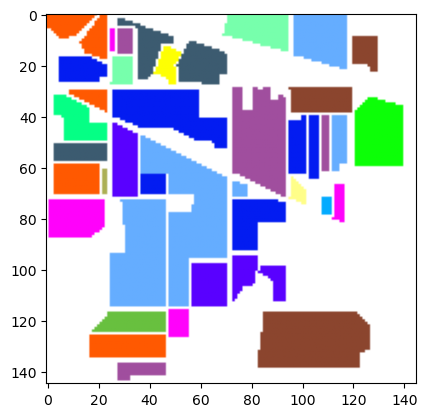

In [245]:
plt.imshow(img)

In [246]:
img=np.random.rand(145,145,3)
for i in range(145):
  for j in range(145):
    img[i][j][0]=img[i][j][1]=img[i][j][2]=0

In [247]:
img=np.random.rand(145,145,3)
for i in range(145):
  for j in range(145):
    img[i][j][0]=img[i][j][1]=img[i][j][2]=0

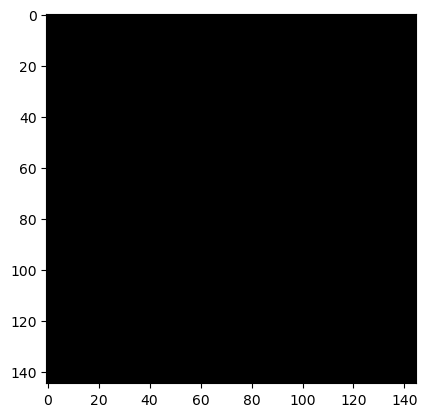

In [248]:
plt.imshow(img)

In [249]:
cell=[]
for i in range(145):
  for j in range(145):
    cell.append([i,j])

In [250]:
df['cell']=cell

In [251]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band213,band214,band215,band216,band217,band218,band219,band220,class,cell
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1112,1090,1062,1069,1057,1020,1020,1005,3,"[0, 0]"
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1117,1091,1079,1085,1064,1029,1020,1000,3,"[0, 1]"
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1114,1100,1065,1092,1061,1030,1016,1009,3,"[0, 2]"
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1109,1109,1071,1088,1060,1030,1006,1005,3,"[0, 3]"
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1112,1094,1072,1087,1052,1034,1019,1019,3,"[0, 4]"


In [252]:
class_map={0:[255,255,255],1:[255,254,137],2:[3,28,241],3:[255,89,1],4:[5,255,133],5:[255,2,251],6:[89,1,255],7:[3,171,255],8:[12,255,7],9:[172,175,84],10:[160,78,158],11:[101,173,255],12:[60,91,112],13:[104,192,63],14:[139,69,46],15:[119,255,172],16:[254,255,3]}
img=np.random.rand(145,145,3)

for i in range(len(df)):
  class_=df.iloc[i]['class']
  j=df.iloc[i]['cell'][0]
  k=df.iloc[i]['cell'][1]
  map_=class_map[class_]

  img[j][k][0]=map_[0]
  img[j][k][1]=map_[1]
  img[j][k][2]=map_[2]
  #print(img[j][k][0],' ',img[j][k][1],' ',img[j][k][2])
  k=k+1
  if k==145:
    k=0
    j=j+1

img=img/255

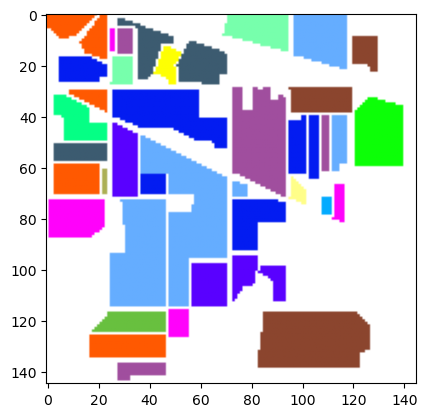

In [253]:
plt.imshow(img)

In [254]:
img.shape

(145, 145, 3)

# Image with background as white and rest as black (grayscale)

In [255]:
img1=np.random.randint(0,2,size=(145,145),dtype=np.uint8)
for i in range(145):
  for j in range(145):
    img1[i][j]=0
for i in range(len(df)):
  if df.iloc[i]['class']==0:
    img1[df.iloc[i]['cell'][0]][df.iloc[i]['cell'][1]]=1


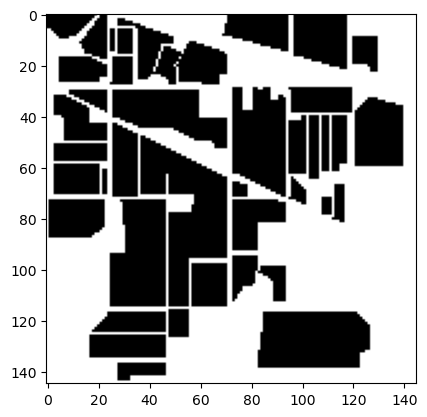

In [256]:
plt.imshow(img1,cmap="gray")

In [257]:
img2=np.random.randint(0,17,size=(145,145),dtype=np.uint8)



In [258]:
tr_color=np.random.randint(0,256,size=(145,145,3),dtype=np.uint8)
ts_color=np.random.randint(0,256,size=(145,145,3),dtype=np.uint8)
tr=np.random.randint(0,18,size=(145,145),dtype=np.uint8)
ts=np.random.randint(0,18,size=(145,145),dtype=np.uint8)

In [259]:
print(tr_color.shape)
print(ts_color.shape)
print(tr.shape)
print(ts.shape)

(145, 145, 3)
(145, 145, 3)
(145, 145)
(145, 145)


In [260]:
for i in range(145):
  for j in range(145):
    tr[i][j]=ts[i][j]=0
    for k in range(3):
      tr_color[i][j][k]=ts_color[i][j][k]=0

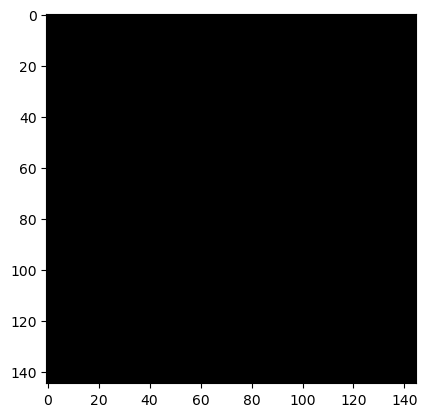

In [261]:
plt.imshow(tr,cmap="gray")

In [262]:
predicted_class=[]
for i in range(len(df)):
  predicted_class.append(["#"])

In [263]:
for i in range(len(df)):
  if(df.iloc[i]['class']==0):
    j=df.iloc[i]['cell'][0]
    k=df.iloc[i]['cell'][1]
    tr_color[j][k][0]=tr_color[j][k][1]=tr_color[j][k][2]=255
    tr[j][k]=ts[j][k]=255

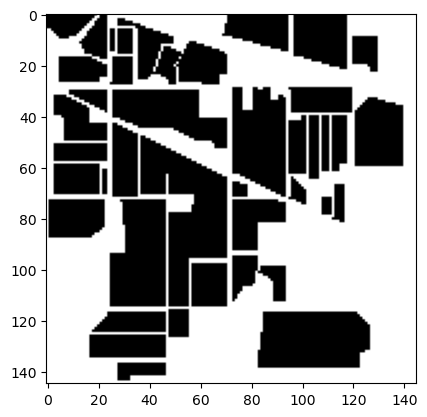

In [264]:
plt.imshow(tr,cmap="gray")

In [265]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band213,band214,band215,band216,band217,band218,band219,band220,class,cell
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1112,1090,1062,1069,1057,1020,1020,1005,3,"[0, 0]"
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1117,1091,1079,1085,1064,1029,1020,1000,3,"[0, 1]"
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1114,1100,1065,1092,1061,1030,1016,1009,3,"[0, 2]"
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1109,1109,1071,1088,1060,1030,1006,1005,3,"[0, 3]"
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1112,1094,1072,1087,1052,1034,1019,1019,3,"[0, 4]"


In [266]:




unlabelled=0
labelled=0
for i in range(len(df)):
  if temp1[i]==True:
    predicted_class[i].append(1)
  if temp2[i]==True:
    predicted_class[i].append(2)
  if temp3[i]==True:
    predicted_class[i].append(3)
  if temp4[i]==True:
    predicted_class[i].append(4)
  if temp5[i]==True:
    predicted_class[i].append(5)
  if temp6[i]==True:
    predicted_class[i].append(6)
  if temp7[i]==True:
    predicted_class[i].append(7)
  if temp8[i]==True:
    predicted_class[i].append(8)
  if temp9[i]==True:
    predicted_class[i].append(9)
  if temp10[i]==True:
    predicted_class[i].append(10)
  if temp11[i]==True:
    predicted_class[i].append(11)
  if temp12[i]==True:
    predicted_class[i].append(12)
  if temp13[i]==True:
    predicted_class[i].append(13)
  if temp14[i]==True:
    predicted_class[i].append(14)
  if temp15[i]==True:
    predicted_class[i].append(15)
  if temp16[i]==True:
    predicted_class[i].append(16)
  if(df.iloc[i]['class']==0):
    labelled+=1
  elif(len(predicted_class[i])>2):
    unlabelled+=1
  elif(len(predicted_class[i])==1):
    unlabelled+=1
  else:
    labelled+=1

print(labelled,' ',unlabelled)



16005   5020


In [267]:
16005-10776

5229

In [268]:
predicted_class[0]

['#', 3]

In [269]:
print((labelled+unlabelled)==(145*145))

True


In [270]:
predicted_class[7]
class_map[1]

[255, 254, 137]

In [271]:
for i in range(len(df)):
  j=df.iloc[i]['cell'][0]
  k=df.iloc[i]['cell'][1]
  if(df.iloc[i]['class']==0):

    tr_color[j][k][0]=tr_color[j][k][1]=tr_color[j][k][2]=255
    tr[j][k]=0
  elif(len(predicted_class[i])==1):
    tr_color[j][k][0]=tr_color[j][k][1]=tr_color[j][k][2]=0
    tr[j][k]=17

  elif(len(predicted_class[i])>2):
    tr_color[j][k][0]=tr_color[j][k][1]=tr_color[j][k][2]=0
    tr[j][k]=17

  else:
    color=predicted_class[i][1]
    tr[j][k]=color
    map_=class_map[color]
    for l in range(3):
      tr_color[j][k][l]=map_[l]


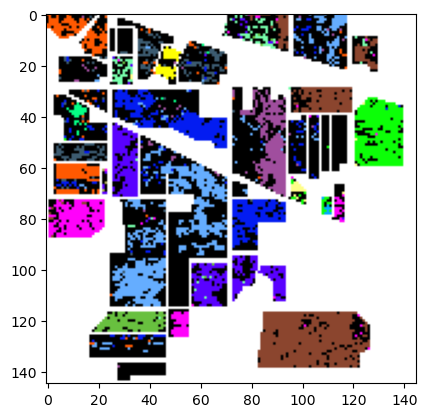

In [272]:
plt.imshow(tr_color)

In [273]:
from skimage import io


3

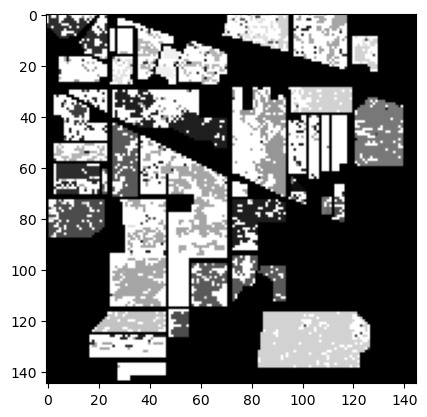

In [274]:
plt.imshow(tr,cmap="gray")
#plt.savefig('tr.png')
tr[0][0]

In [275]:
io.imsave('./tr.tif',tr)

In [276]:
io.imsave('./tr_color.tif',tr_color)

In [277]:
np.save('tr',tr)

In [278]:
np.save('tr_color',tr_color)